the 19th presidential election data

# Load Data

- pop: actual voters

In [1]:
election <- read.csv("./Data/election19th.csv", 
                     fileEncoding = "CP949", encoding = "UTF-8")

In [2]:
head(election)
tail(election)

,X,광역시도,시군,pop,moon,hong,ahn
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,0,서울특별시,종로구,102566,42512,22325,22313
2,1,서울특별시,중구,82852,34062,17901,19372
3,2,서울특별시,용산구,148157,58081,35230,32109
4,3,서울특별시,성동구,203175,86686,40566,45674
5,4,서울특별시,광진구,240030,105512,46368,52824
6,5,서울특별시,동대문구,236092,98958,51631,53359


,X,광역시도,시군,pop,moon,hong,ahn
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
245,244,경상남도,함양군,26640,7388,13008,3203
246,245,경상남도,산청군,24513,6561,12544,2753
247,246,경상남도,거창군,41325,11256,19976,4923
248,247,경상남도,합천군,33021,7143,19699,3077
249,248,제주특별자치도,제주시,273163,125717,48027,55971
250,249,제주특별자치도,서귀포시,101296,43776,20036,21890


# EDA

In [3]:
class(election)

[1] "data.frame"

In [4]:
str(election)

'data.frame':	250 obs. of  7 variables:
 $ X       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ 광역시도: Factor w/ 17 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ 시군    : Factor w/ 227 levels "가평군","강남구",..: 178 179 150 99 30 63 180 100 5 61 ...
 $ pop     : int  102566 82852 148157 203175 240030 236092 265706 295866 210614 229233 ...
 $ moon    : int  42512 34062 58081 86686 105512 98958 111450 129263 89645 94898 ...
 $ hong    : int  22325 17901 35230 40566 46368 51631 56545 57584 42268 47461 ...
 $ ahn     : int  22313 19372 32109 45674 52824 53359 62778 66518 51669 55600 ...


In [5]:
summary(election)

       X                광역시도       시군          pop        
 Min.   :  0.00   경기도    :42   동구   :  6   Min.   :  6810  
 1st Qu.: 62.25   서울특별시:25   중구   :  6   1st Qu.: 38779  
 Median :124.50   경상북도  :24   남구   :  5   Median :108206  
 Mean   :124.50   경상남도  :22   서구   :  5   Mean   :131232  
 3rd Qu.:186.75   전라남도  :22   북구   :  4   3rd Qu.:204097  
 Max.   :249.00   강원도    :18   강서구 :  2   Max.   :543777  
                  (Other)   :97   (Other):222                   
      moon             hong             ahn        
 Min.   :  1443   Min.   :   471   Min.   :   973  
 1st Qu.: 13507   1st Qu.:  9640   1st Qu.:  9110  
 Median : 41153   Median : 26236   Median : 21219  
 Mean   : 53695   Mean   : 31411   Mean   : 27993  
 3rd Qu.: 83561   3rd Qu.: 46545   3rd Qu.: 43610  
 Max.   :239697   Max.   :165781   Max.   :128297  
                                                   

## Calculate the numbers of voters by Province

### aggregate data in terms of Province (광역시도)

In [6]:
provinceSum <- aggregate(pop ~광역시도, election, sum) # pivot table in R
head(provinceSum)

,광역시도,pop
,<fct>,<int>
1,강원도,955885
2,경기도,7916009
3,경상남도,2135055
4,경상북도,1711627
5,광주광역시,957321
6,대구광역시,1581347


### Descending order by population

In [7]:
library(doBy)

In [8]:
# order by population in descending order
provinceSum_ord <- orderBy(~-pop, provinceSum)

# reset rownames
rownames(provinceSum_ord) <- c()
provinceSum_ord

광역시도,pop
<fct>,<int>
경기도,7916009
서울특별시,6590646
부산광역시,2261633
경상남도,2135055
인천광역시,1820091
경상북도,1711627
대구광역시,1581347
충청남도,1240204
전라남도,1238738


## add sum of three candidates (moon, hong, ahn) and the sum of the other candidates

### add sum of three candidates

In [9]:
head(election)

,X,광역시도,시군,pop,moon,hong,ahn
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>
1,0,서울특별시,종로구,102566,42512,22325,22313
2,1,서울특별시,중구,82852,34062,17901,19372
3,2,서울특별시,용산구,148157,58081,35230,32109
4,3,서울특별시,성동구,203175,86686,40566,45674
5,4,서울특별시,광진구,240030,105512,46368,52824
6,5,서울특별시,동대문구,236092,98958,51631,53359


In [10]:
Sum.ThreeCand <- apply(election[,5:7], 1 , sum)
Sum.ThreeCand

[1]  87150  71335 125420 172926 204704 203948 230773 253365 183582 197959
 [11] 322082 272871 180518 216428 266483 340611 242005 135224 213443 236458
 [21] 299263 245284 306767 374895 255903  25277  62750  51609  68521 215223
 [31] 157771 158646 177498 231335  81877 184417 141316  60123 119996 103853
 [41] 131306  43345 178867 108594  84144 226263 231694 306463 113212  59574
 [51]  38426 217975 175939 280003 296009 174746 260883  38753  12861  61799
 [61] 189583 135826 270592 228151 125324 137276 263929 185839 102322 130740
 [71] 183033  87922  98769 114452 132988 161879 189125 105824 185407 129014
 [81] 127137 285225 232610 144314 196316 468538 188998 231458 104494  47985
 [91] 193354 160412 236801 157768 162629  34319  88689 105992 343153 101388
[101] 330921 205099 159218 120090 217416  56600 104105 115603 192679 224815
[111]  91266 193268 172034  78167  24746  61782  33827 149052 174021 112881
[121]  47538  37652  24574  21082  39959  16139  15572  17342  37423  25735
[131]  22599  23937  14180  12295  24536  91399 115904 130060  98716 110671
[141]  73262  17635  28407  19765  29077  49284  35598  23141  18843 179386
[151] 129497  59299  55555 148570  85185  34487  29385  64057  22549  81640
[161]  38275  31189  51954  18429  44034 215146 170746 158126 175629  68180
[171]  51332  53802  57061  16641  15604  14784  18673  18621  36274  33826
[181] 133783 172095 167549  66426  87724  30676  28396  19626  17689  43845
[191]  27912  40469  25050  23381  32728  45216  19758  33434  48551  33089
[201]  21841  27083 142668 125855   5936 142080  79056  91560 202446  60228
[211]  56753  59919  43353  28551 132337  26655  19602  25783  59752  15841
[221]  33922  16274  10536  23331  20115  28315 140474 128692 104766 119098
[231]  98733 194367  72343  30749  63195 275978  62309 127425  17233  38805
[241]  38651 173168  30225  26752  23599  21858  36155  29919 229715  85702

In [11]:
electionSum <- cbind(election, Sum.ThreeCand)
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150
2,1,서울특별시,중구,82852,34062,17901,19372,71335
3,2,서울특별시,용산구,148157,58081,35230,32109,125420
4,3,서울특별시,성동구,203175,86686,40566,45674,172926
5,4,서울특별시,광진구,240030,105512,46368,52824,204704
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948


### Calculate the numbers of votes for other candidates

In [12]:
electionSum$others <- (electionSum$pop - electionSum$Sum.ThreeCand)
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144


# Data Analysis

## Numbers of counties(시군) where those three candidates occupy >= 85% voter share 

### Calculate the portion of three candidates by province and add it to the data.frame

In [13]:
electionSum$PortionThree <- round((electionSum$Sum.ThreeCand/electionSum$pop)*100,2)
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416,84.97
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517,86.10
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737,84.65
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249,85.11
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326,85.28
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144,86.38


### count

In [14]:
# total numbers
nrow(electionSum)

[1] 250

In [15]:
# numbers of >= 85
electionSum$PortionThree >= 85
sum(electionSum$PortionThree >= 85)

[1] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [49] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [73] FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[133] FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[157]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[205]  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[217]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
[229]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE

[1] 202

In [16]:
(sum(electionSum$PortionThree >= 85) / nrow(electionSum))*100

[1] 80.8

80.8% of county shows that the voter share of three candidates occupy 85%.

## Counties where the three candidates dominate >= 93% voter shares. 

In [17]:
over93 <- subset(electionSum, PortionThree >= 93)
over93.ord <- orderBy(~-PortionThree, over93)
over93.ord

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
195,194,전라남도,완도군,34886,20945,762,11021,32728,2158,93.81
202,201,전라남도,신안군,28950,14370,713,12000,27083,1867,93.55
196,195,전라남도,해남군,48351,25901,1158,18157,45216,3135,93.52
189,188,전라남도,구례군,18924,11873,628,5188,17689,1235,93.47
201,200,전라남도,함평군,23368,13539,471,7831,21841,1527,93.47
197,196,전라남도,진도군,21189,10392,511,8855,19758,1431,93.25
60,59,광주광역시,동구,66287,37053,1308,23438,61799,4488,93.23
190,189,전라남도,고흥군,47036,26882,1349,15614,43845,3191,93.22
191,190,전라남도,보성군,29967,16666,732,10514,27912,2055,93.14


In [18]:
# moon
round((over93.ord$moon/over93.ord$pop)*100,2)
round(sum(over93.ord$moon)/sum(over93.ord$pop) * 100, 2)

[1] 60.04 49.64 53.57 62.74 57.94 49.04 55.90 57.15 55.61 58.64

[1] 56.62

Voters living in counties in 전라남도 and 광주광역시 province, the west side of South Korea, tends to majorly vote for one of the three candidates as the proportion is over 93. In particluar, Moon has more than 50% of votes in average on those ten countries.

## Counties where the three candidates occupy the voter share the least

In [19]:
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416,84.97
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517,86.10
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737,84.65
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249,85.11
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326,85.28
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144,86.38


In [20]:
leastOrd.Three <- orderBy(~PortionThree, electionSum)
head(leastOrd.Three, 10)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
43,42,대구광역시,동구,226510,47350,100166,31351,178867,47643,78.97
73,72,울산광역시,북구,122933,52058,26596,20115,98769,24164,80.34
72,71,울산광역시,동구,109054,44931,23701,19290,87922,21132,80.62
47,46,대구광역시,수성구,285528,64922,123074,43698,231694,53834,81.15
46,45,대구광역시,북구,276725,62526,121368,42369,226263,50462,81.76
48,47,대구광역시,달서구,374766,82726,165781,57956,306463,68303,81.77
209,208,경상북도,구미시,246638,62573,98732,41141,202446,44192,82.08
49,48,대구광역시,달성군,137920,31753,60032,21427,113212,24708,82.09
215,214,경상북도,경산시,160794,35602,72129,24606,132337,28457,82.30


Meanwhile, the counties where shows the least proportion of top 3 candidates are mostly in east side of South Korea such as 대구광역시, 울산광역시, and 경상북도.

## Top 5 provinces in vote

In [21]:
head(provinceSum_ord)

,광역시도,pop
,<fct>,<int>
1,경기도,7916009
2,서울특별시,6590646
3,부산광역시,2261633
4,경상남도,2135055
5,인천광역시,1820091
6,경상북도,1711627


In [22]:
elecVoteProv.ord <- orderBy(~-pop, provinceSum_ord)
head(provinceSum_ord, 5)

,광역시도,pop
,<fct>,<int>
1,경기도,7916009
2,서울특별시,6590646
3,부산광역시,2261633
4,경상남도,2135055
5,인천광역시,1820091


In [23]:
provinceSum_ord[1:5,1]

[1] 경기도     서울특별시 부산광역시 경상남도   인천광역시
17 Levels: 강원도 경기도 경상남도 경상북도 광주광역시 대구광역시 ... 충청북도

In [24]:
# cf. County
elecVote.ord <- orderBy(~-pop, electionSum)
head(elecVote.ord)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
86,85,경기도,부천시,543777,239697,100544,128297,468538,75239,86.16
24,23,서울특별시,송파구,441198,177328,98549,99018,374895,66303,84.97
99,98,경기도,남양주시,397972,165079,86026,92048,343153,54819,86.23
16,15,서울특별시,강서구,397108,175882,76601,88128,340611,56497,85.77
101,100,경기도,화성시,386002,176940,69014,84967,330921,55081,85.73
48,47,대구광역시,달서구,374766,82726,165781,57956,306463,68303,81.77


# Data Visualization: Pie

## Plot Voter Share (%) by Province (광역시도) in 3D Pie Chart

In [25]:
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416,84.97
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517,86.10
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737,84.65
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249,85.11
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326,85.28
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144,86.38


### aggregate data in terms of Province (광역시도)

In [26]:
provinceSum <- aggregate(pop ~광역시도, electionSum, sum) # pivot table in R
head(provinceSum)

,광역시도,pop
,<fct>,<int>
1,강원도,955885
2,경기도,7916009
3,경상남도,2135055
4,경상북도,1711627
5,광주광역시,957321
6,대구광역시,1581347


### Descending order by population

In [27]:
# order by population in descending order
provinceSum_ord <- orderBy(~-pop, provinceSum)

# reset rownames
rownames(provinceSum_ord) <- c()
provinceSum_ord

광역시도,pop
<fct>,<int>
경기도,7916009
서울특별시,6590646
부산광역시,2261633
경상남도,2135055
인천광역시,1820091
경상북도,1711627
대구광역시,1581347
충청남도,1240204
전라남도,1238738


### add ratio column

In [28]:
# calculate sum of population
popCount <- sum(provinceSum_ord$pop)
popCount

[1] 32807908

In [29]:
popRatio <- round((provinceSum_ord$pop/popCount * 100),2)
popRatio

[1] 24.13 20.09  6.89  6.51  5.55  5.22  4.82  3.78  3.78  3.68  2.97  2.92
[13]  2.91  2.88  2.27  1.14  0.47

In [30]:
# add popRatio column
provinceSum_ord$popRatio <- popRatio
head(provinceSum_ord)

,광역시도,pop,popRatio
,<fct>,<int>,<dbl>
1,경기도,7916009,24.13
2,서울특별시,6590646,20.09
3,부산광역시,2261633,6.89
4,경상남도,2135055,6.51
5,인천광역시,1820091,5.55
6,경상북도,1711627,5.22


### Create label

In [31]:
popLabel <- paste(provinceSum_ord$광역시도, ":",
                  provinceSum_ord$popRatio, "%")

### Plot pie3D

In [32]:
library(plotrix)

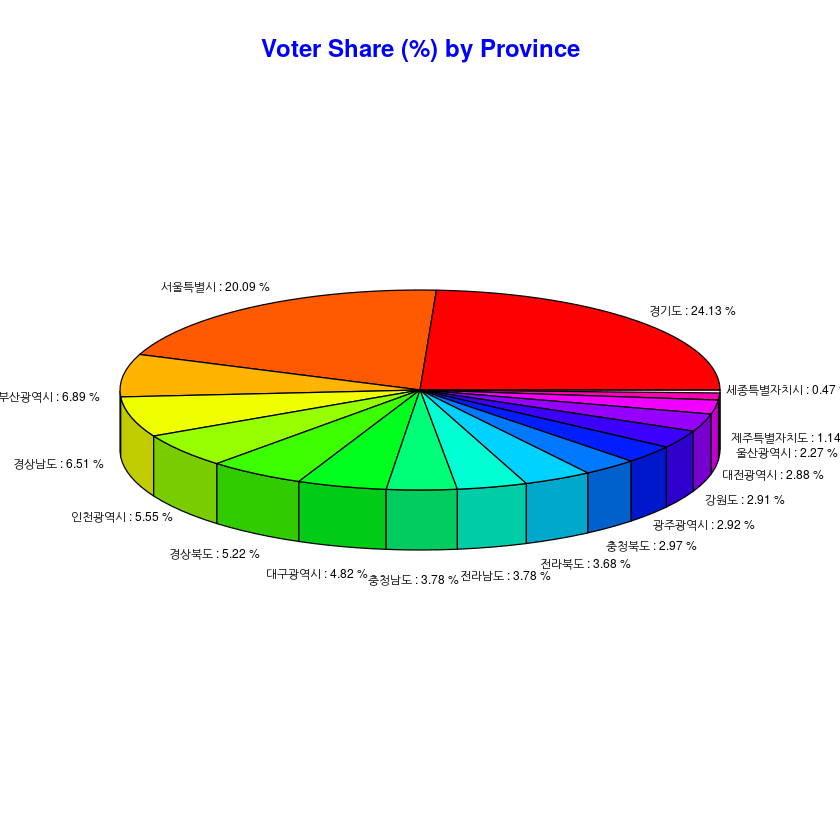

In [33]:
pie3D(provinceSum_ord$popRatio, 
      labels = popLabel, 
      labelcex = 0.6, 
      radius = 1, 
      main = "Voter Share (%) by Province",
     col.main = "blue")

## Plot each candicate's vote rate by Province
- Don't show percentage if it is less than 3%

### aggregate data

In [34]:
elecProv_moon <- aggregate(moon ~광역시도, electionSum, sum)
elecProv_hong <- aggregate(hong ~광역시도, electionSum, sum)
elecProv_ahn  <- aggregate(ahn  ~광역시도, electionSum, sum)

In [35]:
head(elecProv_moon)

,광역시도,moon
,<fct>,<int>
1,강원도,324768
2,경기도,3319812
3,경상남도,779731
4,경상북도,369726
5,광주광역시,583847
6,대구광역시,342620


### Order By votes and reset rownames

In [36]:
elecProv_moon_ord <- orderBy(~-moon, elecProv_moon)
elecProv_hong_ord <- orderBy(~-hong, elecProv_hong)
elecProv_ahn_ord <- orderBy(~-ahn, elecProv_ahn)

rownames(elecProv_moon_ord) <- c()
rownames(elecProv_hong_ord) <- c()
rownames(elecProv_ahn_ord)  <- c()

### add ratio

In [37]:
elecProv_moon_ord$ratio <- round(elecProv_moon_ord$moon/sum(elecProv_moon_ord$moon)*100,2)
elecProv_hong_ord$ratio <- round(elecProv_hong_ord$hong/sum(elecProv_hong_ord$hong)*100,2)
elecProv_ahn_ord$ratio  <- round(elecProv_ahn_ord$ahn/sum(elecProv_ahn_ord$ahn)*100,2)

In [38]:
head(elecProv_moon_ord)

,광역시도,moon,ratio
,<fct>,<int>,<dbl>
1,경기도,3319812,24.73
2,서울특별시,2781345,20.72
3,부산광역시,872127,6.50
4,경상남도,779731,5.81
5,전라북도,778747,5.80
6,인천광역시,747090,5.57


### Create label

In [39]:
moonLabel <- paste(elecProv_moon_ord$광역시도,
                   ifelse((elecProv_moon_ord$ratio > 3),
                   paste("\n",elecProv_moon_ord$ratio, "%"), ""))

hongLabel <- paste(elecProv_hong_ord$광역시도, 
                   ifelse((elecProv_hong_ord$ratio > 3),
                   paste("\n", elecProv_hong_ord$ratio, "%"), ""))

ahnLabel <- paste(elecProv_ahn_ord$광역시도,
                  ifelse((elecProv_ahn_ord$ratio > 3),
                  paste("\n", elecProv_ahn_ord$ratio, "%"), ""))

### Plot pie3D

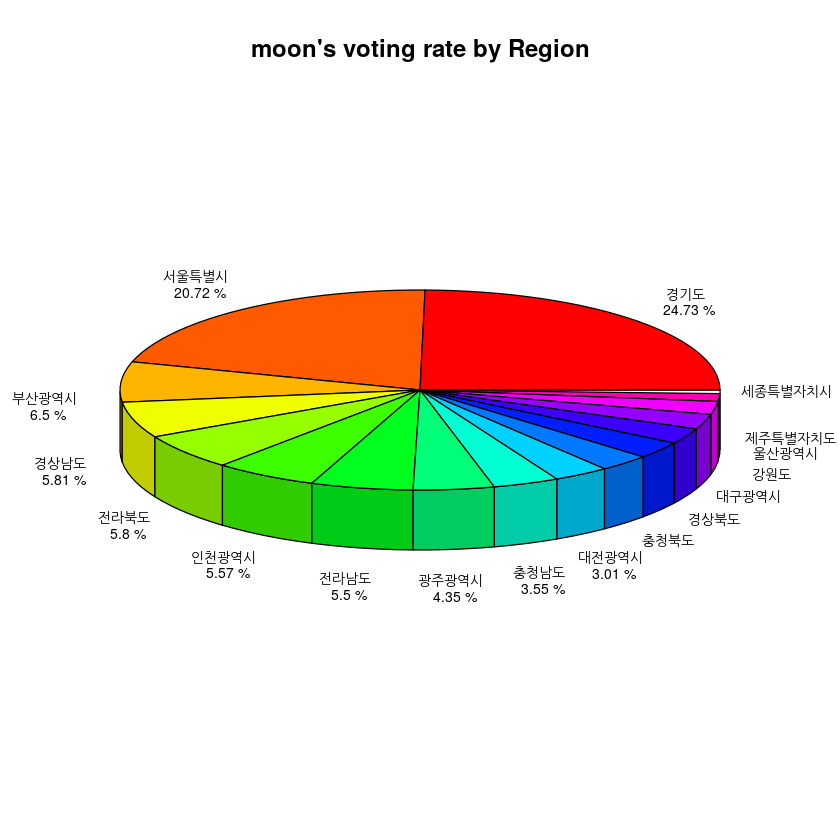

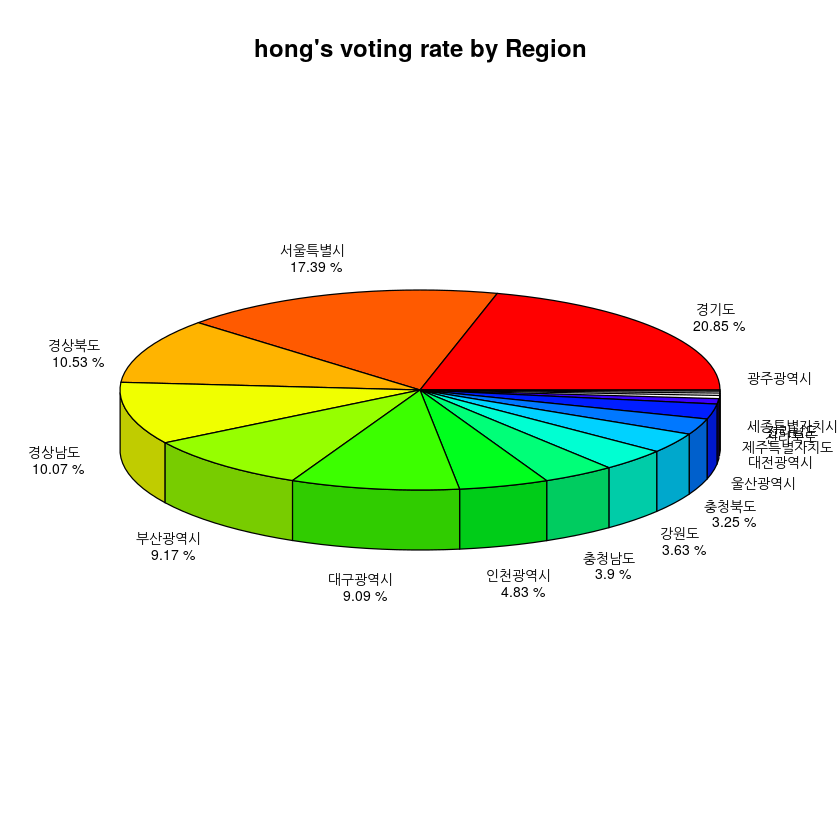

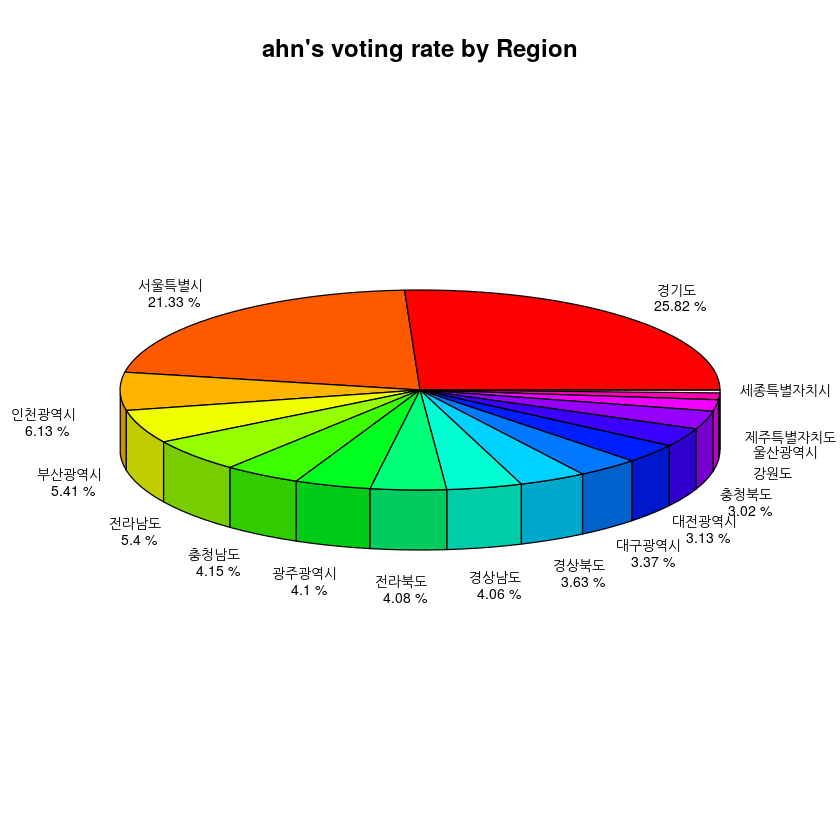

In [40]:
pie3D(elecProv_moon_ord$ratio,
      labels = moonLabel,
      main = "moon's voting rate by Region",
      labelcex=0.7)

pie3D(elecProv_hong_ord$ratio,
      labels = hongLabel,
      main = "hong's voting rate by Region",
      labelcex=0.7)

pie3D(elecProv_ahn_ord$ratio,
      labels = ahnLabel,
      main = "ahn's voting rate by Region",
      labelcex=0.7)

Interestingly, we can see that the proportion of Moon's voting rate is similar to the propotion of voter share.

## Plot top 5 counties(시군) in Seoul(서울특별시) for Moon

### Subset and aggregate

In [41]:
# in R
elecSeoul <- subset(electionSum, 광역시도 == "서울특별시")
head(electionSum)

# Alternatively, like Python
# election[election$광역시도 == "서울특별시",]

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416,84.97
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517,86.10
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737,84.65
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249,85.11
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326,85.28
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144,86.38


In [42]:
elecSeoul.moonCounty <- aggregate(moon ~시군, elecSeoul, sum)

### orderBy moon and reset rownames

In [43]:
elecSeoul.moonCounty.ord <- orderBy(~-moon, elecSeoul.moonCounty)

rownames(elecSeoul.moonCounty.ord) <- c()
head(elecSeoul.moonCounty.ord)

,시군,moon
,<fct>,<int>
1,송파구,177328
2,강서구,175882
3,관악구,159854
4,노원구,158167
5,은평구,140180
6,양천구,133853


### Create the ratio

In [44]:
elecSeoul.moonCounty.ord$ratio <- round(elecSeoul.moonCounty.ord$moon/sum(elecSeoul.moonCounty.ord$moon)*100,2)

In [45]:
head(elecSeoul.moonCounty.ord)

,시군,moon,ratio
,<fct>,<int>,<dbl>
1,송파구,177328,6.38
2,강서구,175882,6.32
3,관악구,159854,5.75
4,노원구,158167,5.69
5,은평구,140180,5.04
6,양천구,133853,4.81


In [46]:
top5moon.ratio <- c(elecSeoul.moonCounty.ord[1:5,3], 
                    sum(elecSeoul.moonCounty.ord[-(1:5),3]))
top5moon.ratio

# top5moon.ratio <- c(elecSeoul.moonCounty.ord[seq(1:5),3], 
#                     sum(elecSeoul.moonCounty.ord[-seq(1:5),3]))

[1]  6.38  6.32  5.75  5.69  5.04 70.83

### Create label

In [47]:
# c.f. tricky part
elecSeoul.moonCounty.ord$시군[1:5]
c(elecSeoul.moonCounty.ord$시군[1:5], "etc.") # factor value is going to be input in the vector.
paste(elecSeoul.moonCounty.ord$시군[1:5], "etc.")
str(elecSeoul.moonCounty.ord$시군)

# So, we need to convert factor into character to input characters in the vector.

[1] 송파구 강서구 관악구 노원구 은평구
227 Levels: 가평군 강남구 강동구 강릉시 강북구 강서구 강진군 강화군 ... 횡성군

[1] "104"  "6"    "25"   "53"   "159"  "etc."

[1] "송파구 etc." "강서구 etc." "관악구 etc." "노원구 etc." "은평구 etc."

 Factor w/ 227 levels "가평군","강남구",..: 104 6 25 53 159 126 100 2 3 66 ...


In [48]:
top5moon.label <- c(as.character(elecSeoul.moonCounty.ord$시군[1:5]), "etc.")
top5moon.label

[1] "송파구" "강서구" "관악구" "노원구" "은평구" "etc."

In [49]:
labeltop5.m <- paste(top5moon.label, "\n", top5moon.ratio, "%")
labeltop5.m

[1] "송파구 \n 6.38 %" "강서구 \n 6.32 %" "관악구 \n 5.75 %" "노원구 \n 5.69 %"
[5] "은평구 \n 5.04 %" "etc. \n 70.83 %"

### Plot pie3D

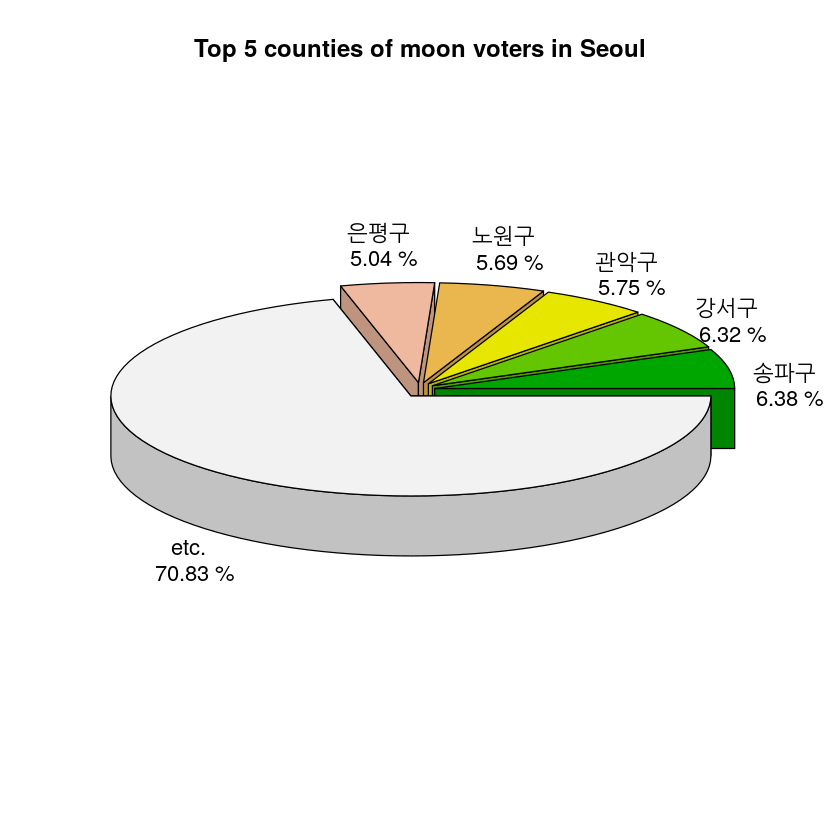

In [50]:
pie3D(top5moon.ratio,
      labels = labeltop5.m,
      main = "Top 5 counties of moon voters in Seoul",
      labelcex=1.1,
      col = terrain.colors(n=6), # rainbow(), heat.colors(), terrain.colors(), topo.colors()
      explode = 0.05)

## Vote rate for the candidates at the President Moon's place of birth
- President Moon's birthplace: 거제시

### Data selection by subset

In [51]:
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416,84.97
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517,86.10
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737,84.65
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249,85.11
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326,85.28
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144,86.38


In [52]:
moonPoB <- subset(electionSum, electionSum$시군 == "거제시")
moonPoB

# subset(electionSum, 시군 == "거제시")
# election[election$시군 == "거제시",]

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
238,237,경상남도,거제시,150230,68291,38775,20359,127425,22805,84.82


### Create ratio

ratio

In [53]:
moonPoB

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
238,237,경상남도,거제시,150230,68291,38775,20359,127425,22805,84.82


In [54]:
ratioMoonPoB <- round(moonPoB[, c(5:7, 9)]/moonPoB[,4]*100,2)
ratioMoonPoB
# moonBirthplace[5:7]/moonBirthplace$pop

,moon,hong,ahn,others
,<dbl>,<dbl>,<dbl>,<dbl>
238,45.46,25.81,13.55,15.18


In [55]:
ratioMoonPoB$etc <- round(((moonPoB[,4] - sum(moonPoB[,5:7]))/moonPoB[,4]*100),2)
ratioMoonPoB

ratioMoonPoB.T <- as.data.frame(t(ratioMoonPoB)) # t(): transpose & convert into matrix
ratioMoonPoB.T
colnames(ratioMoonPoB.T) <- c("ratio")
ratioMoonPoB.T

,moon,hong,ahn,others,etc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
238,45.46,25.81,13.55,15.18,15.18


,238
,<dbl>
moon,45.46
hong,25.81
ahn,13.55
others,15.18
etc,15.18


,ratio
,<dbl>
moon,45.46
hong,25.81
ahn,13.55
others,15.18
etc,15.18


In [56]:
ratioMoonPoB[,1:4]

,moon,hong,ahn,others
,<dbl>,<dbl>,<dbl>,<dbl>
238,45.46,25.81,13.55,15.18


In [57]:
# Alternatively, tricky part is to convert data.frame calculation into numeric,
# because data.frame and vector cannot be calculated

# moonPoBratio <- c(round(as.numeric(moonPoB[,5:7]/moonPoB[,4])*100,2),
#                     round((moonPoB[,4]-sum(moonPoB[,5:7]))/moonPoB[,4]*100,2))
# moonPoBratio

### Create label

In [58]:
labelMoonPo <- paste(colnames(ratioMoonPoB), "\n", 
                     ratioMoonPoB[1:4], "%")
labelMoonPo

[1] "moon \n 45.46 %"   "hong \n 25.81 %"   "ahn \n 13.55 %"   
[4] "others \n 15.18 %" "etc \n 45.46 %"

In [59]:
colnames(ratioMoonPoB)

[1] "moon"   "hong"   "ahn"    "others" "etc"

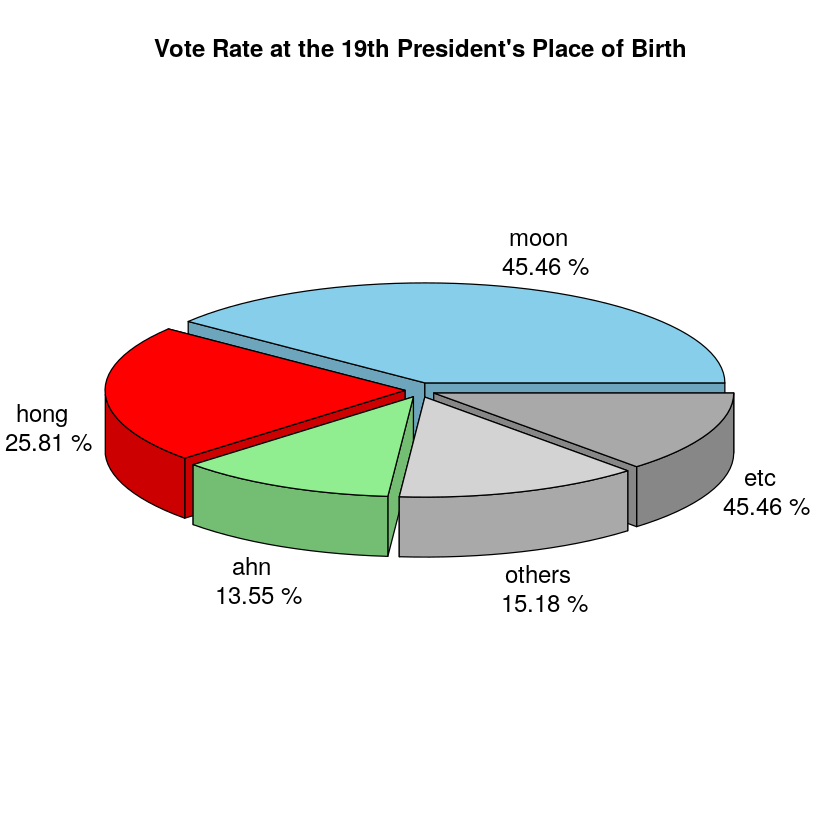

In [62]:
pie3D(ratioMoonPoB.T$ratio,
     labels = labelMoonPo,
     main = "Vote Rate at the 19th President's Place of Birth",
     col = c("sky blue", "red", "light green", "light gray", "dark gray"),
     explode = 0.05,
     labelcex=1.2,
     )

# Data Visualization: barplot

## Plot the number of votes for the candidates in the provinces with top 4 most votes

### aggregate data, orderBy votes(population), and reset rownames

In [85]:
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416,84.97
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517,86.10
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737,84.65
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249,85.11
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326,85.28
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144,86.38


In [86]:
### aggregate data in terms of Province (광역시도)
provinceSum <- aggregate(pop ~광역시도, electionSum, sum)

### Descending order by population
# order by population in descending order
provinceSum_ord <- orderBy(~-pop, provinceSum)

# reset rownames
rownames(provinceSum_ord) <- c()
head(provinceSum_ord)

,광역시도,pop
,<fct>,<int>
1,경기도,7916009
2,서울특별시,6590646
3,부산광역시,2261633
4,경상남도,2135055
5,인천광역시,1820091
6,경상북도,1711627


### Find top4 provinces

In [87]:
top4provinces <- provinceSum_ord[1:4, 1]
top4provinces

[1] 경기도     서울특별시 부산광역시 경상남도  
17 Levels: 강원도 경기도 경상남도 경상북도 광주광역시 대구광역시 ... 충청북도

### aggregate votes by candicates

In [88]:
provinceMoonSum <- aggregate(moon ~광역시도, electionSum, sum)
provinceHongSum <- aggregate(hong ~광역시도, electionSum, sum)
provinceAhnSum  <- aggregate(ahn ~광역시도, electionSum, sum)
provinceOthersSum  <- aggregate(others ~광역시도, electionSum, sum)

# provinceEtcSum  <- aggregate((pop-moon-hong-ahn) ~광역시도, election, sum)

In [89]:
head(provinceMoonSum)

,광역시도,moon
,<fct>,<int>
1,강원도,324768
2,경기도,3319812
3,경상남도,779731
4,경상북도,369726
5,광주광역시,583847
6,대구광역시,342620


### Find the number of votes for each candicates in those 4 provinces

In [90]:
Top4moon = rbind(subset(provinceMoonSum, 광역시도 == top4provinces[1])[2], # 경기도
                 subset(provinceMoonSum, 광역시도 == top4provinces[2])[2], # 서울특별시
                 subset(provinceMoonSum, 광역시도 == top4provinces[3])[2], # 부산광역시
                 subset(provinceMoonSum, 광역시도 == top4provinces[4])[2] # 경상남도
                )
Top4hong = rbind(subset(provinceHongSum, 광역시도 == top4provinces[1])[2], # 경기도
                 subset(provinceHongSum, 광역시도 == top4provinces[2])[2], # 서울특별시
                 subset(provinceHongSum, 광역시도 == top4provinces[3])[2], # 부산광역시
                 subset(provinceHongSum, 광역시도 == top4provinces[4])[2] # 경상남도
                )
Top4ahn = rbind(subset(provinceAhnSum, 광역시도 == top4provinces[1])[2], # 경기도
                subset(provinceAhnSum, 광역시도 == top4provinces[2])[2], # 서울특별시
                subset(provinceAhnSum, 광역시도 == top4provinces[3])[2], # 부산광역시
                subset(provinceAhnSum, 광역시도 == top4provinces[4])[2] # 경상남도
                )
Top4others = rbind(subset(provinceOthersSum, 광역시도 == top4provinces[1])[2], # 경기도
                subset(provinceOthersSum, 광역시도 == top4provinces[2])[2], # 서울특별시
                subset(provinceOthersSum, 광역시도 == top4provinces[3])[2], # 부산광역시
                subset(provinceOthersSum, 광역시도 == top4provinces[4])[2] # 경상남도
                )

In [91]:
Top4moon

,moon
,<int>
2,3319812
9,2781345
8,872127
3,779731


In [92]:
top4 <- cbind(Top4moon, Top4hong, Top4ahn, Top4others)
top4

,moon,hong,ahn,others
,<int>,<int>,<int>,<int>
2,3319812,1637345,1807308,1151544
9,2781345,1365285,1492767,951249
8,872127,720484,378907,290115
3,779731,790491,284272,280561


### convert data type and structure into appropriate ones to draw barplot

In [93]:
top4.t.df <- as.data.frame(t(top4)) # to handle data cf.) t(top4): matrix 
top4.t.df

,2,9,8,3
,<int>,<int>,<int>,<int>
moon,3319812,2781345,872127,779731
hong,1637345,1365285,720484,790491
ahn,1807308,1492767,378907,284272
others,1151544,951249,290115,280561


In [94]:
colnames(top4.t.df) <- c("경기도", "서울특별시", "부산광역시", "경상남도")
top4.t.df

,경기도,서울특별시,부산광역시,경상남도
,<int>,<int>,<int>,<int>
moon,3319812,2781345,872127,779731
hong,1637345,1365285,720484,790491
ahn,1807308,1492767,378907,284272
others,1151544,951249,290115,280561


In [95]:
rownames(top4.t.df) <- c("Moon", "Hong", "Ahn", "Etc.")


In [96]:
top4matrix <- as.matrix(top4.t.df) # to draw barplot
top4matrix # each columns will be a bar in barplot

,경기도,서울특별시,부산광역시,경상남도
Moon,3319812,2781345,872127,779731
Hong,1637345,1365285,720484,790491
Ahn,1807308,1492767,378907,284272
Etc.,1151544,951249,290115,280561


### barplot

In [97]:
library(RColorBrewer)

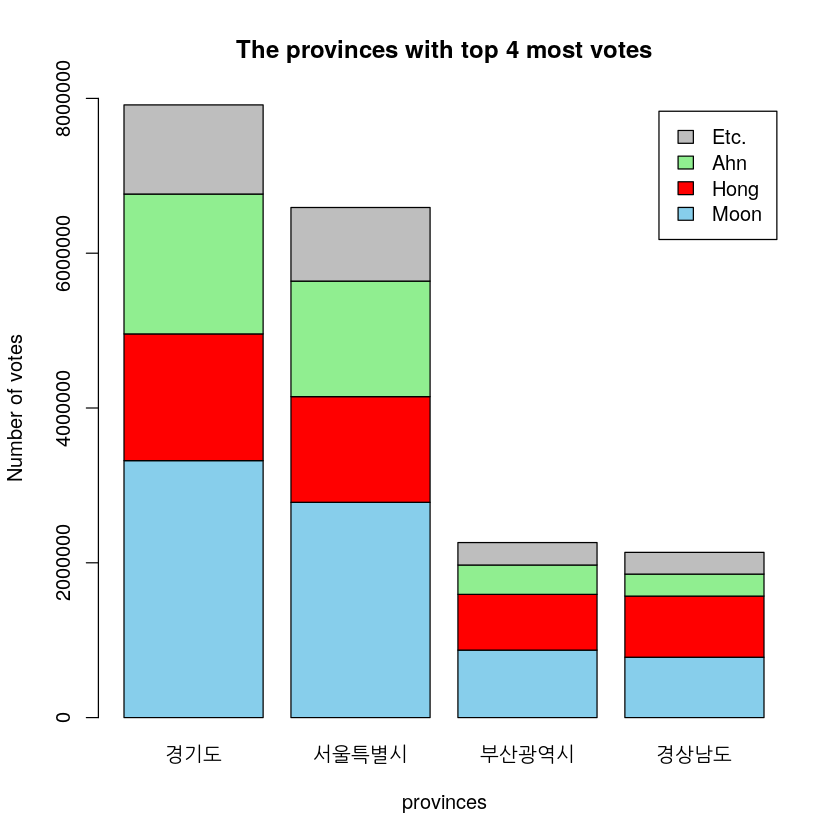

In [98]:
options(scipen=100)

barplot(top4matrix,
       ylim = c(0, 8000000),
       main = "The provinces with top 4 most votes",
       col = c("sky blue", "red", "light green", "gray"), # Color of each party
       legend.text = T,
       xlab = "provinces",
       ylab = "Number of votes"
       )

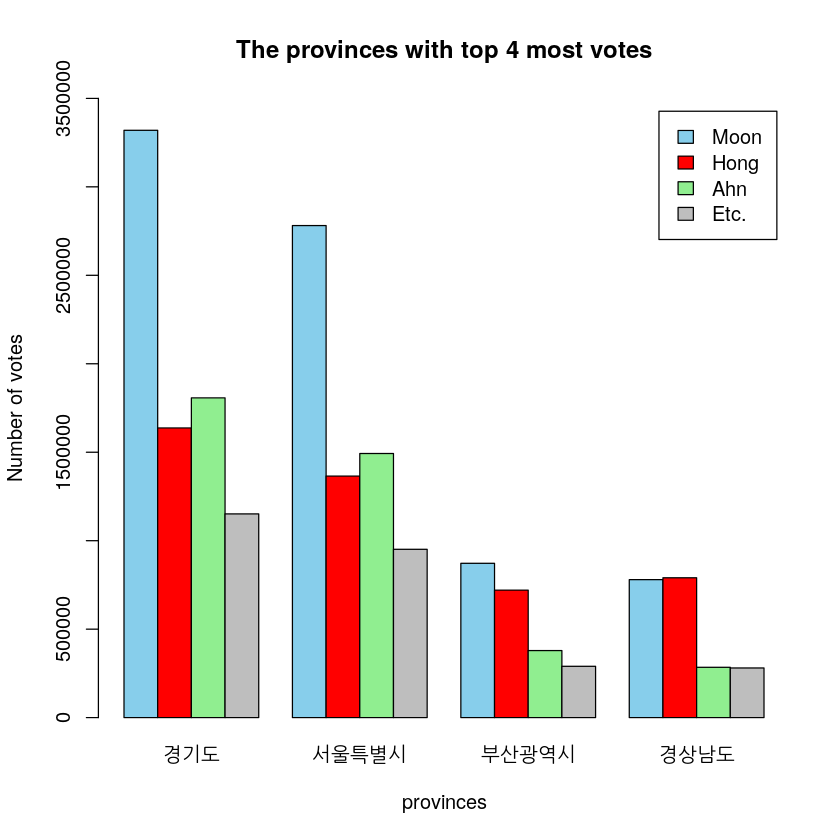

In [99]:
options(scipen=100)

barplot(top4matrix,
       ylim = c(0, 3500000),
       main = "The provinces with top 4 most votes",
       col = c("sky blue", "red", "light green", "gray"), # Color of each party
       legend.text = T,
       xlab = "provinces",
       ylab = "Number of votes",
       beside = T 
       )

## Plot the number of votes for the candidates in the counties(시군) with top 5 most votes

### aggregate data, orderBy votes(population), and reset rownames

In [100]:
head(electionSum)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,0,서울특별시,종로구,102566,42512,22325,22313,87150,15416,84.97
2,1,서울특별시,중구,82852,34062,17901,19372,71335,11517,86.10
3,2,서울특별시,용산구,148157,58081,35230,32109,125420,22737,84.65
4,3,서울특별시,성동구,203175,86686,40566,45674,172926,30249,85.11
5,4,서울특별시,광진구,240030,105512,46368,52824,204704,35326,85.28
6,5,서울특별시,동대문구,236092,98958,51631,53359,203948,32144,86.38


In [101]:
## aggregate data in terms of Province (시군)
countySum <- aggregate(pop ~시군, electionSum, sum)

In [102]:
## Descending order by population
# order by population in descending order
countySum_ord <- orderBy(~-pop, electionSum)

In [103]:
# reset rownames
rownames(countySum_ord) <- c()
head(countySum_ord)

,X,광역시도,시군,pop,moon,hong,ahn,Sum.ThreeCand,others,PortionThree
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,85,경기도,부천시,543777,239697,100544,128297,468538,75239,86.16
2,23,서울특별시,송파구,441198,177328,98549,99018,374895,66303,84.97
3,98,경기도,남양주시,397972,165079,86026,92048,343153,54819,86.23
4,15,서울특별시,강서구,397108,175882,76601,88128,340611,56497,85.77
5,100,경기도,화성시,386002,176940,69014,84967,330921,55081,85.73
6,47,대구광역시,달서구,374766,82726,165781,57956,306463,68303,81.77


### Find top5 provinces

In [104]:
top5counties <- countySum_ord[1:5, 3]
top5counties

[1] 부천시   송파구   남양주시 강서구   화성시  
227 Levels: 가평군 강남구 강동구 강릉시 강북구 강서구 강진군 강화군 ... 횡성군

### aggregate votes by candicates

In [105]:
countyMoonSum <- aggregate(moon ~시군, electionSum, sum)
countyHongSum <- aggregate(hong ~시군, electionSum, sum)
countyAhnSum  <- aggregate(ahn ~시군, electionSum, sum)
countyOthersSum  <- aggregate(others ~시군, electionSum, sum)

#countyOthersSum  <- aggregate((pop-moon-hong-ahn) ~시군, electionSum, sum)

head(countyMoonSum)

,시군,moon
,<fct>,<int>
1,가평군,10873
2,강남구,128927
3,강동구,122511
4,강릉시,41565
5,강북구,89645
6,강서구,206665


In [106]:
subset(countyMoonSum, 시군 == top5counties[2])[2]

,moon
,<int>
104,177328


In [107]:
rbind(subset(countyMoonSum, 시군 == top5counties[1])[2], 
                 subset(countyMoonSum, 시군 == top5counties[2])[2])

,moon
,<int>
81,239697
104,177328


### Find the number of votes for each candicates in those 4 provinces

In [108]:
Top5moon = rbind(subset(countyMoonSum, 시군 == top5counties[1])[2], 
                 subset(countyMoonSum, 시군 == top5counties[2])[2], 
                 subset(countyMoonSum, 시군 == top5counties[3])[2], 
                 subset(countyMoonSum, 시군 == top5counties[4])[2], 
                 subset(countyMoonSum, 시군 == top5counties[5])[2] 
                )

Top5hong = rbind(subset(countyHongSum, 시군 == top5counties[1])[2], 
                 subset(countyHongSum, 시군 == top5counties[2])[2], 
                 subset(countyHongSum, 시군 == top5counties[3])[2], 
                 subset(countyHongSum, 시군 == top5counties[4])[2], 
                 subset(countyHongSum, 시군 == top5counties[5])[2] 
                )

Top5ahn = rbind(subset(countyAhnSum, 시군 == top5counties[1])[2], 
                subset(countyAhnSum, 시군 == top5counties[2])[2], 
                subset(countyAhnSum, 시군 == top5counties[3])[2], 
                subset(countyAhnSum, 시군 == top5counties[4])[2], 
                subset(countyAhnSum, 시군 == top5counties[4])[2]
                )

Top5others = rbind(subset(countyOthersSum, 시군 == top5counties[1])[2], 
                subset(countyOthersSum, 시군 == top5counties[2])[2], 
                subset(countyOthersSum, 시군 == top5counties[3])[2], 
                subset(countyOthersSum, 시군 == top5counties[4])[2], 
                subset(countyOthersSum, 시군 == top5counties[4])[2] 
                )

Top5moon

top5 <- cbind(Top5moon, Top5hong, Top5ahn, Top5others)
top5

,moon
,<int>
81,239697
104,177328
50,165079
6,206665
224,176940


,moon,hong,ahn,others
,<int>,<int>,<int>,<int>
81,239697,100544,128297,75239
104,177328,98549,99018,66303
50,165079,86026,92048,54819
6,206665,95312,98757,65007
224,176940,69014,98757,65007


### convert data type and structure into appropriate ones to draw barplot

In [109]:
top5.t.df <- as.data.frame(t(top5)) # to handle data cf.) t(top4): matrix 
top5.t.df

,81,104,50,6,224
,<int>,<int>,<int>,<int>,<int>
moon,239697,177328,165079,206665,176940
hong,100544,98549,86026,95312,69014
ahn,128297,99018,92048,98757,98757
others,75239,66303,54819,65007,65007


In [110]:
# change colnames and rownames
colnames(top5.t.df) <- c("부천시", "송파구", "남양주시", "강서구", "화성시")
top5.t.df

rownames(top5.t.df) <- c("Moon", "Hong", "Ahn", "Others")
top5.t.df

,부천시,송파구,남양주시,강서구,화성시
,<int>,<int>,<int>,<int>,<int>
moon,239697,177328,165079,206665,176940
hong,100544,98549,86026,95312,69014
ahn,128297,99018,92048,98757,98757
others,75239,66303,54819,65007,65007


,부천시,송파구,남양주시,강서구,화성시
,<int>,<int>,<int>,<int>,<int>
Moon,239697,177328,165079,206665,176940
Hong,100544,98549,86026,95312,69014
Ahn,128297,99018,92048,98757,98757
Others,75239,66303,54819,65007,65007


In [111]:
top5matrix <- as.matrix(top5.t.df) # to draw barplot
top5matrix # each columns will be a bar in barplot

,부천시,송파구,남양주시,강서구,화성시
Moon,239697,177328,165079,206665,176940
Hong,100544,98549,86026,95312,69014
Ahn,128297,99018,92048,98757,98757
Others,75239,66303,54819,65007,65007


### barplot

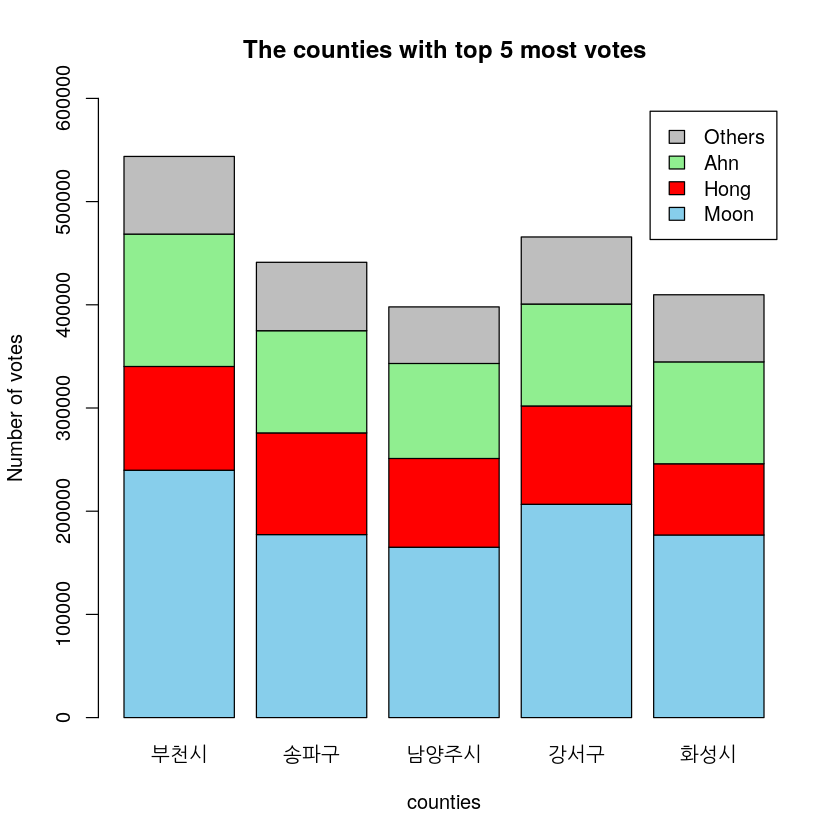

In [112]:
library(RColorBrewer)

options(scipen=100)

barplot(top5matrix,
       ylim = c(0, 600000),
       main = "The counties with top 5 most votes",
       col = c("sky blue", "red", "light green", "gray"), # Color of each party
       legend.text = T,
       xlab = "counties",
       ylab = "Number of votes"
       )

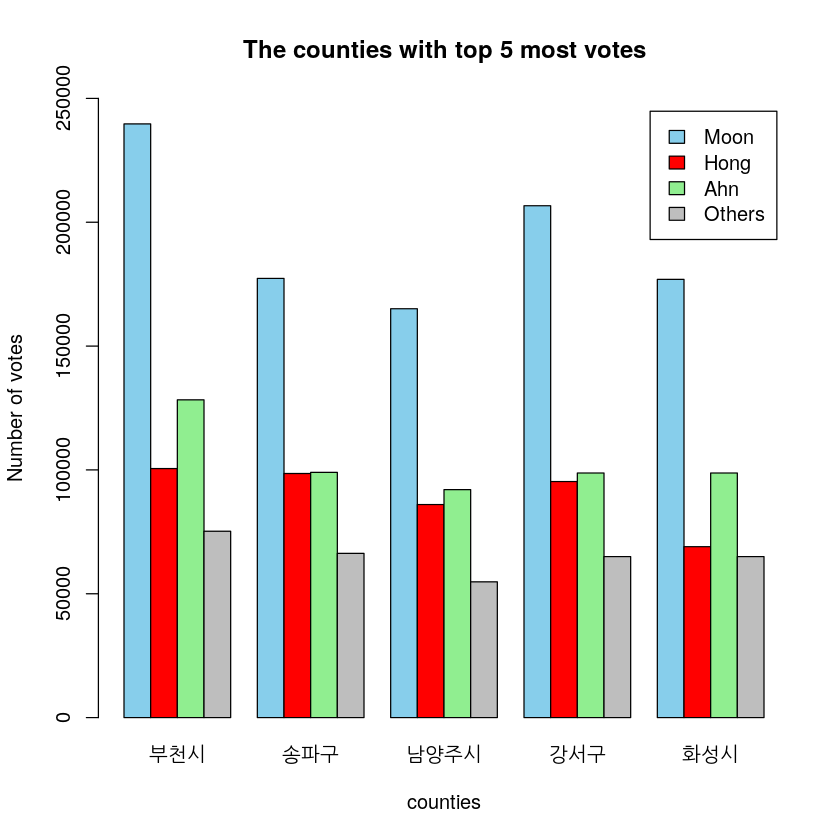

In [113]:
barplot(top5matrix,
       ylim = c(0, 250000),
       main = "The counties with top 5 most votes",
       col = c("sky blue", "red", "light green", "gray"), # Color of each party
       legend.text = T,
       xlab = "counties",
       ylab = "Number of votes",
       beside = T 
       )

###### Reference

http://m.nec.go.kr/bos/cmm/fms/FileDown?atchFileId=d9385d27b8c762fa43e45b57073bb3814957eb53de1fa7f3d309d6e3516dbcc8&fileSn=1